1. Loading Data and Preprocessing

In [ ]:
#importing required modules and libraries
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer

In [6]:
df=pd.read_csv('input3.csv',encoding='latin', 
                   names = ['target','id','date','flag','user','text'])

In [7]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
#dropping columns that are not useful in context of this model
df.drop(columns=['id','date','user','flag'],inplace=True)
df = df[['text','target']]

In [9]:
df.isna().sum()

text      0
target    0
dtype: int64

<Axes: >

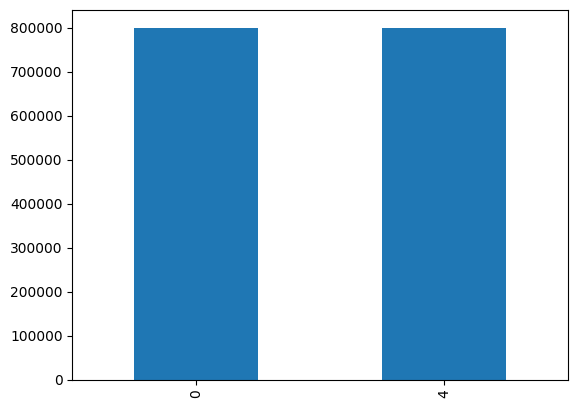

In [10]:
#visualizing number of tweets in each category(positive and negative)
df.target.value_counts().plot(kind='bar')

In [11]:
#replacing label of positive tweets from 4 to 1
df['target'] = df['target'].replace(4,1)

In [12]:
df.shape

(1600000, 2)

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stemmer = nltk.SnowballStemmer("english")
STOPWORDS = stopwords.words('english')
STOPWORDS.remove('not')

#function to preprocess text by converting to lower case, removing mentions and links and stem the words and remove stopwords
def clean_text(text):
    
    text = str(text).lower()                                           # converting to lower case
    text = re.sub(r'@\S+|http\S+|www.\S+|\n','',text)                  # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                        # removing special characters 
    
    text = [stemmer.stem(word) for word in text.split(' ')]            # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])  # remove stopwords
    text = text.strip()                                                # remove extra spaces from start and end of string
     
    return text

df['text'] = df['text'].apply(clean_text)

In [16]:
df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset cant updat facebook text might cri resul...,0
2,dive mani time ball manag save 50 rest go bound,0
3,whole bodi feel itchi like fire,0
4,not behav im mad whi becaus cant see,0


In [17]:
# import wordcloud
# from wordcloud import WordCloud
# wc = WordCloud(width=800, height=600, random_state=42,max_font_size=100).generate(df['text'][0])

# import matplotlib.pyplot as plt
# plt.figure(figsize = (15,10))
# plt.imshow(wc, interpolation ='bilinear')
# plt.axis('off')
# plt.show()

2. Model fitting and evaluation

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#creating pipeline to vectorize text and fit in the model
model = make_pipeline(TfidfVectorizer(ngram_range=(1,2)), MultinomialNB(alpha=1.0))

In [20]:
#splitting data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df['text'],df['target'],test_size =0.2 , random_state = 42)

In [21]:
#fit data to model
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB())])

In [22]:
#predicting test data
predicted = model.predict(X_test)

In [80]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =model.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[131374  28120]
 [ 40509 119997]]


In [81]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred_cnb)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79    159494
           1       0.81      0.75      0.78    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

Area Under the Curve =  0.7856546694093335


In [90]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

def predict_sentiment(tweet):
    tweet = clean_text(tweet)
    y = model.predict([tweet])
    print(y[0])
    if(y[0]==0):
        print("Negative")
    else:
        print("Positive",)
    print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
    f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")

F1 score =78.53%
Precision score =78.72%
Recall score =78.57%


In [93]:
def predict_sentiment(tweet):
    tweet = clean_text(tweet)
    y = model.predict([tweet])
    print(y[0])
    if(y[0]==0):
        print("Negative", float(accuracy))
    else:
        print("Positive", float(accuracy))

3. Predicting sentiments

In [94]:


tweet1 = ''' Just had the best day ever at the beach! Sun, sand, and waves. Can't wait to go back! #summerfun #beachday  '''
tweet2 = ''' Feeling so frustrated with this never-ending traffic. Why does it always have to be this way? #trafficwoes #ugh  '''
tweet3 = ''' Just got my dream job offer! So excited to start this new chapter in my life. #dreamjob #careermove  '''
tweet4 = ''' The film does a good job of balancing this large cast and it’s just a fun superhero movie with a lot of heart.  '''
tweet5 = ''' So disappointed with the customer service at this store. They were rude and unhelpful. #customerservicefail #disappointed  '''

predict_sentiment(tweet1)
predict_sentiment(tweet2)
predict_sentiment(tweet3)
predict_sentiment(tweet4)
predict_sentiment(tweet5)

1
Positive 0.785534375
0
Negative 0.785534375
1
Positive 0.785534375
1
Positive 0.785534375
0
Negative 0.785534375


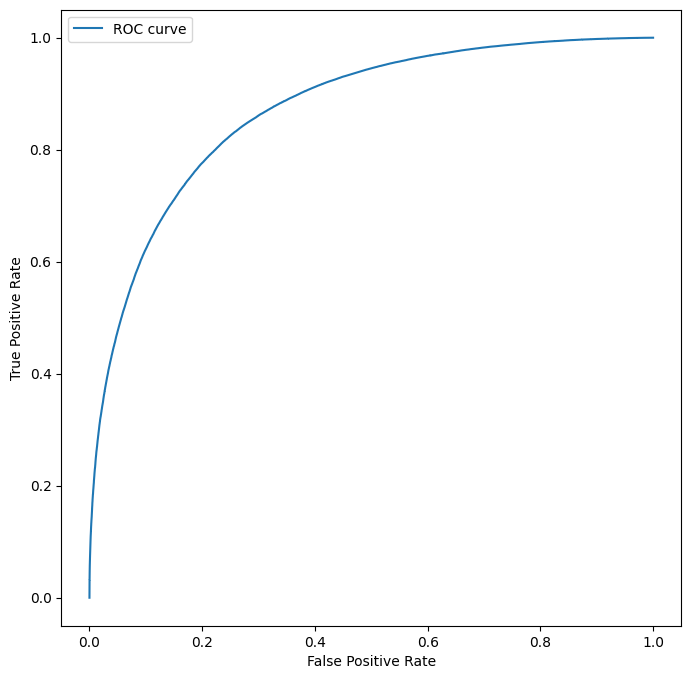

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

In [97]:
import pickle

pickle.dump(model, open('naiveBayes.pkl', 'wb'))
